In [129]:
import numpy as np
import cv2

import PIL.Image as Image
#import os

#import matplotlib.pylab as plt

#import tensorflow as tf
#import tensorflow_hub as tensorflow_hub

import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential

import pathlib

In [131]:
angry_dataset_dir = "dataset/train/Angry"
disguist_dataset_dir = "dataset/train/Disguist"
fear_dataset_dir = "dataset/train/Fear"

happy_dataset_dir = "dataset/train/Happy"
Neutral_dataset_dir = "dataset/train/Neutral"
sad_dataset_dir = "dataset/train/Sad"


angry_dataset_dir = pathlib.Path(angry_dataset_dir)
print(angry_dataset_dir)
disguist_dataset_dir = pathlib.Path(disguist_dataset_dir)
print(disguist_dataset_dir)
fear_dataset_dir = pathlib.Path(fear_dataset_dir)
print(fear_dataset_dir)
happy_dataset_dir = pathlib.Path(happy_dataset_dir)
print(happy_dataset_dir)
Neutral_dataset_dir = pathlib.Path(Neutral_dataset_dir)
print(Neutral_dataset_dir)
sad_dataset_dir = pathlib.Path(sad_dataset_dir)
print(sad_dataset_dir)

train\Angry
train\Disguist
train\Fear
train\Happy
train\Neutral
train\Sad


In [132]:
list(angry_dataset_dir.glob('*'))[:5]

[WindowsPath('train/Angry/download (1).jpg'),
 WindowsPath('train/Angry/download (17).jpg'),
 WindowsPath('train/Angry/download (2).jpg'),
 WindowsPath('train/Angry/download (3).jpg'),
 WindowsPath('train/Angry/download (4).jpg')]

In [133]:
image_count = len(list(angry_dataset_dir.glob('*')))
image_count

50

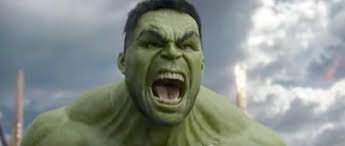

In [134]:
confused = list(angry_dataset_dir.glob("*"))
Image.open(str(confused[5])) 

In [135]:
image_dict = {
    'angry': list(angry_dataset_dir.glob('*')),
    'disguist' : list(disguist_dataset_dir.glob('*')),
    'fear': list(fear_dataset_dir.glob('*')),
    'happy' : list(happy_dataset_dir.glob('*')),
    'neutral': list(Neutral_dataset_dir.glob('*')),
    'sad' : list(sad_dataset_dir.glob('*')),
}

In [136]:
labels_dict = {
    'angry': 0,
    'disguist' : 1,
    'fear': 2,
    'happy' : 3,
    'neutral': 4,
    'sad' : 5,
}

labels_class = ['angry','disguist','fear','happy','neutral','sad',]

In [137]:
img = cv2.imread(str(image_dict['angry'][9]))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
img.shape

(168, 300, 3)

In [138]:
X = []
y = []

for label, images in image_dict.items():
  for image in images:
    try:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img,(224,224))
      X.append(resized_img)
      y.append(labels_dict[label])
    except Exception as e:
      print(label)
      print(str(e))


In [139]:
X[0]

array([[[77, 76, 80],
        [64, 63, 67],
        [65, 65, 68],
        ...,
        [88, 78, 78],
        [87, 77, 77],
        [91, 81, 81]],

       [[77, 76, 80],
        [64, 63, 67],
        [66, 64, 69],
        ...,
        [88, 78, 78],
        [87, 77, 77],
        [91, 81, 81]],

       [[77, 76, 80],
        [64, 63, 67],
        [65, 64, 68],
        ...,
        [88, 78, 78],
        [87, 77, 77],
        [90, 80, 80]],

       ...,

       [[74, 69, 69],
        [57, 52, 53],
        [57, 51, 52],
        ...,
        [51, 34, 25],
        [51, 32, 24],
        [54, 36, 27]],

       [[75, 69, 70],
        [57, 51, 52],
        [57, 51, 52],
        ...,
        [52, 33, 25],
        [51, 32, 24],
        [54, 35, 27]],

       [[75, 68, 70],
        [57, 51, 52],
        [57, 51, 52],
        ...,
        [52, 33, 25],
        [51, 32, 24],
        [54, 35, 27]]], dtype=uint8)

In [140]:
X = np.array(X)
y = np.array(y)

In [141]:
X[0].shape

(224, 224, 3)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [143]:
X_test.shape

(75, 224, 224, 3)

In [144]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
out_img = Image.fromarray(X_test[300],'RGB')
out_img.show()

In [145]:
import tensorflow_hub as hub
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [146]:
model = keras.Sequential([
  pretrained_model_without_top_layer,
  keras.layers.Dense(6,activation='softmax')
])

In [147]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [164]:
history = model.fit(X_train,y_train,epochs = 50 , validation_data = (X_test, y_test))

Epoch 1/50
8/8 [==============================] - 7s 851ms/step - loss: 0.8275 - accuracy: 0.7778 - val_loss: 1.5876 - val_accuracy: 0.3467
Epoch 2/50
8/8 [==============================] - 6s 776ms/step - loss: 0.8005 - accuracy: 0.7733 - val_loss: 1.6125 - val_accuracy: 0.4000
Epoch 3/50
8/8 [==============================] - 6s 756ms/step - loss: 0.7694 - accuracy: 0.8000 - val_loss: 1.6604 - val_accuracy: 0.3600
Epoch 4/50
8/8 [==============================] - 6s 775ms/step - loss: 0.7249 - accuracy: 0.8178 - val_loss: 1.6069 - val_accuracy: 0.4000
Epoch 5/50
8/8 [==============================] - 6s 803ms/step - loss: 0.6825 - accuracy: 0.8311 - val_loss: 1.5880 - val_accuracy: 0.4267
Epoch 6/50
8/8 [==============================] - 6s 812ms/step - loss: 0.6634 - accuracy: 0.8444 - val_loss: 1.6185 - val_accuracy: 0.3867
Epoch 7/50
8/8 [==============================] - 6s 789ms/step - loss: 0.6294 - accuracy: 0.8756 - val_loss: 1.6432 - val_accuracy: 0.3467
Epoch 8/50
8/8 [====

In [149]:
import matplotlib.pyplot as plt

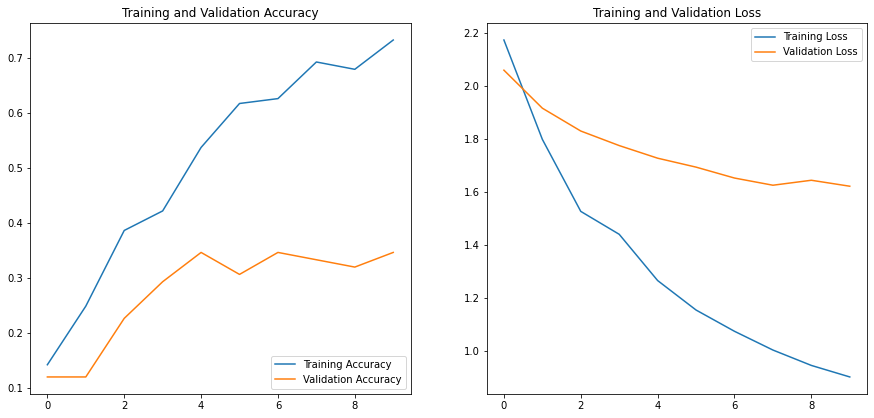

In [150]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [213]:
rohit_dataset_dir = "dataset/rohit"
rohit_dataset_dir = pathlib.Path(rohit_dataset_dir)

In [214]:
rohit_images = list(rohit_dataset_dir.glob('*'))
rohit_images

[WindowsPath('rohit/a1.jpeg'),
 WindowsPath('rohit/a2.jpeg'),
 WindowsPath('rohit/a3.jpeg'),
 WindowsPath('rohit/a4.jpeg'),
 WindowsPath('rohit/b1.jpeg'),
 WindowsPath('rohit/r1.jpeg'),
 WindowsPath('rohit/r2.jpeg'),
 WindowsPath('rohit/r3.jpeg'),
 WindowsPath('rohit/r4.png'),
 WindowsPath('rohit/r5.jpg'),
 WindowsPath('rohit/r6.png'),
 WindowsPath('rohit/r7.jpg'),
 WindowsPath('rohit/r8.jpeg')]

In [215]:
X_rohit = []

for image in rohit_images:
    img = cv2.imread(str(image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img,(224,224))
    X_rohit.append(resized_img)

In [216]:
X_rohit = np.array(X_rohit)
X_rohit = X_rohit / 255.0

In [217]:
predictions = model.predict(X_rohit)

1/1 [==============================] - 0s 347ms/step


In [218]:
val = 4

In [219]:
rohit_pred_index = np.argmax(predictions[val])

Pridicted state:  happy


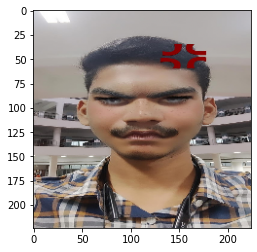

In [220]:
plt.imshow(X_rohit[val])
#plt.xlabel(labels_class[y_test[2]])
print("Pridicted state: ",labels_class[rohit_pred_index])